# Tarea: Predecir si un pokemon es legendario o no

In [1]:
# Paso 0: Importación de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

import torch
import torch.nn as nn
import torch.optim as optim

In [7]:
# Paso 1: Cargar y preparar el dataset de Pokémon
df = pd.read_csv('./datasets/pokemon/pokemon.csv')
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [8]:
# Paso 2: Procesamiento de datos
# ¿Es legendario o no?
df['is_legendary'] = df['is_legendary'].astype(int)  # 1 = Legendario, 0 = No legendario

# Seleccionamos características relevantes
features = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']
X = df[features]
y = df['is_legendary']

In [9]:
# Paso 2.5: Normalizamos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# División de datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

In [12]:
# Paso 3: Instancia de modelos

modelos = {
    "Regresión Logística": LogisticRegression(max_iter=1000),
    "Árbol de Decisión": DecisionTreeClassifier(max_depth=2),  # intentionally shallow
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(probability=True),
    "MLP (Sklearn)": MLPClassifier(hidden_layer_sizes=(10,), max_iter=500)
}

resultados = {}

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    resultados[nombre] = acc
    print(f"\nModelo: {nombre}")
    print(classification_report(y_test, y_pred))


Modelo: Regresión Logística
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       220
           1       0.75      0.43      0.55        21

    accuracy                           0.94       241
   macro avg       0.85      0.71      0.76       241
weighted avg       0.93      0.94      0.93       241


Modelo: Árbol de Decisión
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       220
           1       0.53      0.38      0.44        21

    accuracy                           0.92       241
   macro avg       0.74      0.67      0.70       241
weighted avg       0.91      0.92      0.91       241


Modelo: Random Forest
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       220
           1       0.89      0.38      0.53        21

    accuracy                           0.94       241
   macro avg       0.92      0.69      0.75      

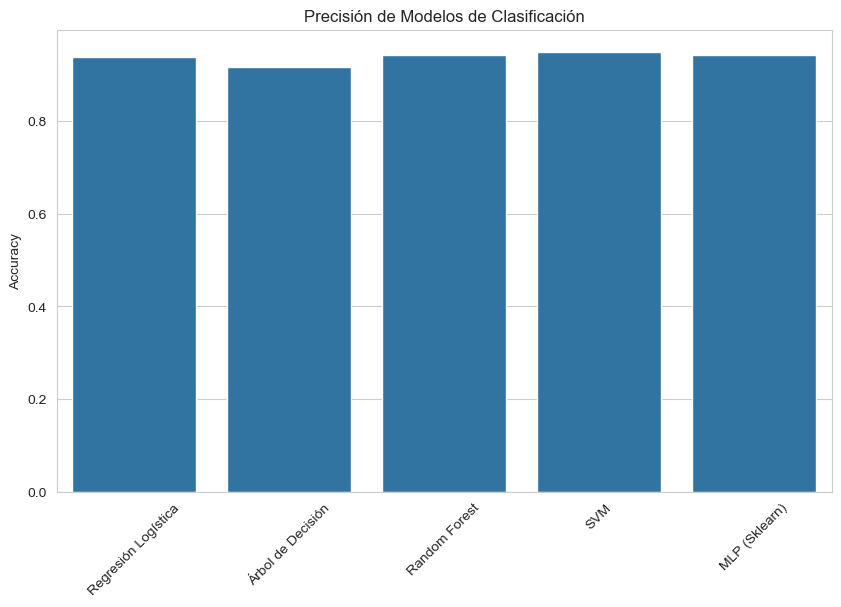

In [13]:
# Paso 4: Visualización de resultados

plt.figure(figsize=(10, 6))
sns.barplot(x=list(resultados.keys()), y=list(resultados.values()))
plt.xticks(rotation=45)
plt.title("Precisión de Modelos de Clasificación")
plt.ylabel("Accuracy")
plt.show()

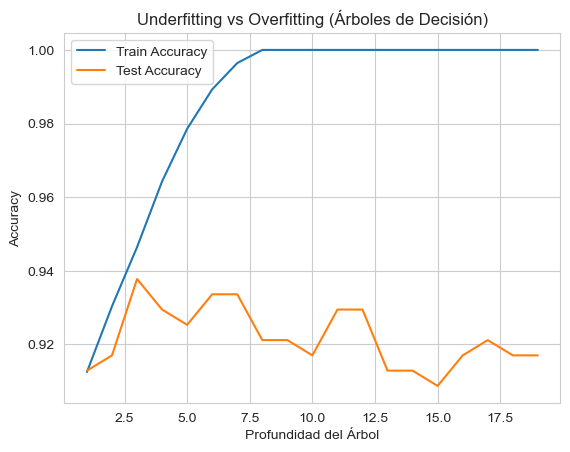

In [14]:
# Paso 5: Ejemplo de underfitting y overfitting con árboles

train_scores, test_scores = [], []
depths = range(1, 20)
for d in depths:
    tree = DecisionTreeClassifier(max_depth=d)
    tree.fit(X_train, y_train)
    train_scores.append(tree.score(X_train, y_train))
    test_scores.append(tree.score(X_test, y_test))

plt.plot(depths, train_scores, label='Train Accuracy')
plt.plot(depths, test_scores, label='Test Accuracy')
plt.xlabel('Profundidad del Árbol')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Underfitting vs Overfitting (Árboles de Decisión)')
plt.show()

In [15]:
# Paso 6: Usamos una Red Neuronal en PyTorch
class SimpleNN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 10)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(10, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

In [16]:
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
y_train_torch = torch.tensor(y_train.values.reshape(-1, 1), dtype=torch.float32)
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_test_torch = torch.tensor(y_test.values.reshape(-1, 1), dtype=torch.float32)

In [17]:
model = SimpleNN(X_train.shape[1])
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

for epoch in range(100):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_torch)
    loss = criterion(outputs, y_train_torch)
    loss.backward()
    optimizer.step()

model.eval()
with torch.no_grad():
    pred_probs = model(X_test_torch)
    preds = (pred_probs > 0.5).float()
    acc = (preds.eq(y_test_torch).sum() / y_test_torch.shape[0]).item()
    print(f"\nRed Neuronal PyTorch - Accuracy: {acc:.2f}")


Red Neuronal PyTorch - Accuracy: 0.95


# Tarea: Predecir el tipo1 de un pokemon

In [ ]:
# Paso 0: Importación de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [ ]:
# Paso 1: Cargar y preparar el dataset de Pokémon
df = pd.read_csv("pokemon.csv")

In [ ]:
# Paso 2: Preprocesamiento de datos

# Tipo 1 del Pokémon
le = LabelEncoder()
df['Type1_encoded'] = le.fit_transform(df['type1'])

# Seleccionamos características relevantes
features = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']
X = df[features]
y = df['Type1_encoded']

In [ ]:
# Paso 2.5: Normalizamos

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# División de datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
# Paso 3: Instancia, Entrenamiento y Compraración de Modelos
modelos = {
    "Regresión Logística": LogisticRegression(max_iter=1000, multi_class='multinomial'),
    "Árbol de Decisión": DecisionTreeClassifier(max_depth=5),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(probability=True, decision_function_shape='ovo'),
    "MLP (Sklearn)": MLPClassifier(hidden_layer_sizes=(50,), max_iter=500)
}

resultados = {}

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    resultados[nombre] = acc
    print(f"\nModelo: {nombre}")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

In [ ]:
# Paso 4: Visualización de resultados
plt.figure(figsize=(10, 6))
sns.barplot(x=list(resultados.keys()), y=list(resultados.values()))
plt.xticks(rotation=45)
plt.title("Precisión de Modelos de Clasificación Multiclase")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
# === Ejercicio 1 ===
print("\nEjercicio 1: ¿Qué modelo obtuvo mejor desempeño? ¿A qué crees que se deba?")

In [ ]:
# === Ejercicio 2 ===
print("\nEjercicio 2: Cambia las características de entrada. ¿Qué ocurre si usas solo Attack, Defense y Speed?")

In [ ]:
# Paso 5: Underfitting vs Overfitting con Redes Neuronales
class NNUnderfit(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.fc = nn.Linear(input_dim, output_dim)  # red muy simple

    def forward(self, x):
        return self.fc(x)

class NNOverfit(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, output_dim) # red muy compleja
        )

    def forward(self, x):
        return self.net(x)

In [ ]:
# Preparación de datos para PyTorch
X_train_t = torch.tensor(X_train, dtype=torch.float32)
X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_train_t = torch.tensor(y_train.values, dtype=torch.long)
y_test_t = torch.tensor(y_test.values, dtype=torch.long)

input_dim = X_train.shape[1]
output_dim = len(le.classes_)

In [ ]:
# Entrenamiento

def entrenar(model, lr=0.01, epochs=100):
    optimizer = optim.Adam(model.parameters(), lr=lr)
    losses = []
    for epoch in range(epochs):
        model.train()
        outputs = model(X_train_t)
        loss = F.cross_entropy(outputs, y_train_t)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

    plt.plot(losses)
    plt.title("Evolución del loss")
    plt.xlabel("Época")
    plt.ylabel("Loss")
    plt.show()

    model.eval()
    with torch.no_grad():
        logits = model(X_test_t)
        preds = torch.argmax(logits, dim=1)
        acc = (preds == y_test_t).float().mean().item()
        print(f"Accuracy: {acc:.2f}")
        print(classification_report(y_test_t, preds, target_names=le.classes_))

In [ ]:
print("\nRed Neuronal con Underfitting:")
modelo_under = NNUnderfit(input_dim, output_dim)
entrenar(modelo_under, epochs=50)

In [ ]:
print("\nRed Neuronal con Overfitting:")
modelo_over = NNOverfit(input_dim, output_dim)
entrenar(modelo_over, epochs=300)

In [ ]:
# === Pregunta teórica ===
print("\nPregunta: ¿Por qué el modelo simple (underfitting) tiene menor precisión incluso con muchas épocas?")
print("¿Qué podrías hacer para mejorarlo sin caer en overfitting?")

In [ ]:
# === Ejercicio 3 ===
print("\nEjercicio 3: Modifica el modelo overfit agregando Dropout o EarlyStopping. ¿Qué sucede con el rendimiento?")

# Tarea: Predecir el Critic Score de un videojuego basado en sus características

In [ ]:
# Paso 0: Importación de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [ ]:
# Paso 1: Cargar los datos (reemplaza con tu URL o ruta local)
url = 'videogames.csv'  # Reemplazar con URL real o cargar archivo en Colab
df = pd.read_csv(url)

In [ ]:
# Paso 2: Preprocesamiento de datos
print("Primeras filas del dataset:")
print(df.head())

# Eliminar filas con valores nulos en las columnas importantes

# Codificación de variables categóricas

# Variable objetivo: Critic_Score_Class

# Variables con formato que necesita transformacion

# Selección de características
features = []
X = df[features]
y = df['target']

print("\n")
print("Dataset transformado:")
print(df.head())

In [ ]:
# Paso 3: Normalizacion
# Escalado de características numéricas


In [ ]:
# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
# Paso 4: Entrenamiento de modelos tradicionales
modelos = {
    "Regresión Logística": LogisticRegression(max_iter=1000, multi_class='multinomial'),
    "Árbol de Decisión": DecisionTreeClassifier(max_depth=5),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(probability=True, decision_function_shape='ovo'),
    "Naive Bayes": GaussianNB()
}

resultados = {}

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    resultados[nombre] = acc
    print(f"\nModelo: {nombre}")
    print(classification_report(y_test, y_pred))

In [ ]:
# Paso 5: Visualización de resultados
plt.figure(figsize=(10, 6))
sns.barplot(x=list(resultados.keys()), y=list(resultados.values()))
plt.xticks(rotation=45)
plt.title("Precisión de Modelos de Clasificación Multiclase")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
# Paso 6: Red Neuronal simple en PyTorch
class NNClassifier(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, output_dim)
        )

    def forward(self, x):
        return self.fc(x)

X_train_t = torch.tensor(X_train, dtype=torch.float32)
X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_train_t = torch.tensor(y_train.values, dtype=torch.long)
y_test_t = torch.tensor(y_test.values, dtype=torch.long)

input_dim = X_train.shape[1]
output_dim = # Cuantas classes tiene el target?

model = NNClassifier(input_dim, output_dim)
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [ ]:
# Paso 7: Entrenamiento
losses = []
for epoch in range(100):
    model.train()
    outputs = model(X_train_t)
    loss = F.cross_entropy(outputs, y_train_t)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

plt.plot(losses)
plt.title("Evolución del loss")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.show()

model.eval()
with torch.no_grad():
    logits = model(X_test_t)
    preds = torch.argmax(logits, dim=1)
    acc = (preds == y_test_t).float().mean().item()
    print(f"\nAccuracy Red Neuronal: {acc:.2f}")
    print(classification_report(y_test_t, preds))

In [ ]:
# === Ejercicio 1 ===
print("\nEjercicio 1: Cambia la arquitectura de la red. ¿Qué pasa si reduces el número de neuronas o capas?")

In [ ]:
# === Ejercicio 2 ===
print("\nEjercicio 2: Prueba eliminar una de las variables de entrada. ¿Cómo afecta al rendimiento del modelo?")

In [ ]:
# === Pregunta teórica ===
print("\nPregunta: ¿Cuál de los modelos evaluados te parece más interpretable? ¿Y cuál parece tener mejor capacidad predictiva?")